In [0]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [0]:
def simple_threshold(im, threshold=.5):
    return ((im > threshold)).astype("float32")

In [0]:
batch_size = 128
epochs = 10

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

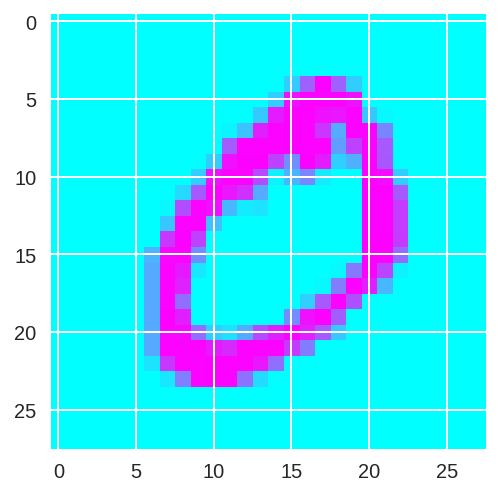

In [41]:
plt.imshow(x_train[1], cmap="cool")

In [42]:
x_train.shape

(60000, 28, 28)

In [43]:
x_test.shape

(10000, 28, 28)

In [0]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [46]:
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dense(248, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(56, activation='sigmoid'))
# ----------------------------------------
model.add(Dense(2, activation='sigmoid'))
# ----------------------------------------
model.add(Dense(56, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(248, activation='sigmoid'))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(784, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 248)               127224    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               31872     
_________________________________________________________________
dense_14 (Dense)             (None, 56)                7224      
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 114       
_________________________________________________________________
dense_16 (Dense)             (None, 56)                168       
_________________________________________________________________
dense_17 (Dense)             (None, 128)               7296      
__________

In [0]:
keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=0, verbose=0, mode='auto')
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [48]:
history = model.fit(x_train, x_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 125us/step - loss: 599.9292 - acc: 0.0050 - val_loss: 606.1641 - val_acc: 0.0143
Epoch 2/10
60000/60000 [==============================] - 7s 113us/step - loss: 592.4832 - acc: 0.0106 - val_loss: 592.0558 - val_acc: 0.0046
Epoch 3/10
60000/60000 [==============================] - 7s 111us/step - loss: 581.1121 - acc: 0.0050 - val_loss: 584.0952 - val_acc: 0.0126
Epoch 4/10
60000/60000 [==============================] - 7s 112us/step - loss: 574.8681 - acc: 0.0083 - val_loss: 581.3312 - val_acc: 0.0100
Epoch 5/10
60000/60000 [==============================] - 7s 113us/step - loss: 572.0374 - acc: 0.0079 - val_loss: 578.1517 - val_acc: 0.0085
Epoch 6/10
60000/60000 [==============================] - 7s 111us/step - loss: 569.6037 - acc: 0.0064 - val_loss: 576.5585 - val_acc: 0.0131
Epoch 7/10
60000/60000 [==============================] - 7s 110us/step - loss: 568.5288 - acc: 0.

In [0]:
pred = model.predict(x_train)

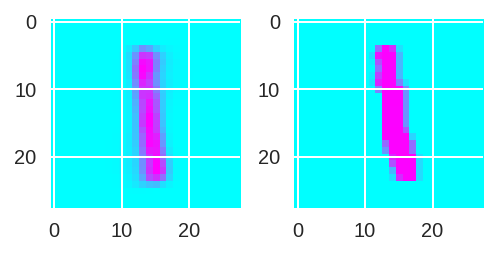

In [50]:
k = 6
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(4, 1,1)
plt.imshow(x_train[k].reshape(28, 28),cmap="cool")
fig.add_subplot(4, 2,1)
plt.imshow(pred[k].reshape(28, 28),cmap="cool")
plt.show()

In [0]:
from keras import backend as K
get_image = K.function([model.layers[5].input, K.learning_phase()],
                           [model.layers[-1].output])

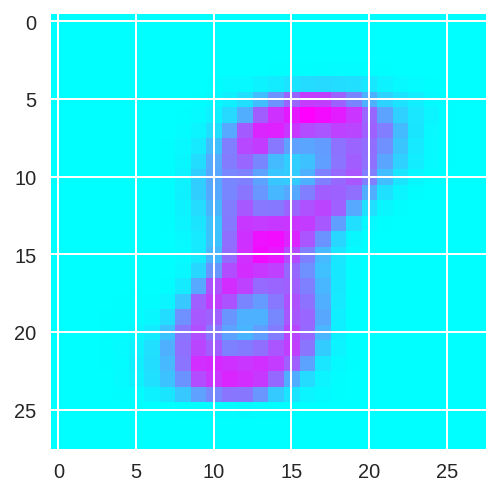

In [52]:
vector = np.array([0.8, .3]).reshape(1,2)
h1 = get_image([vector])[0]
plt.imshow(h1.reshape(28, 28), cmap="cool")

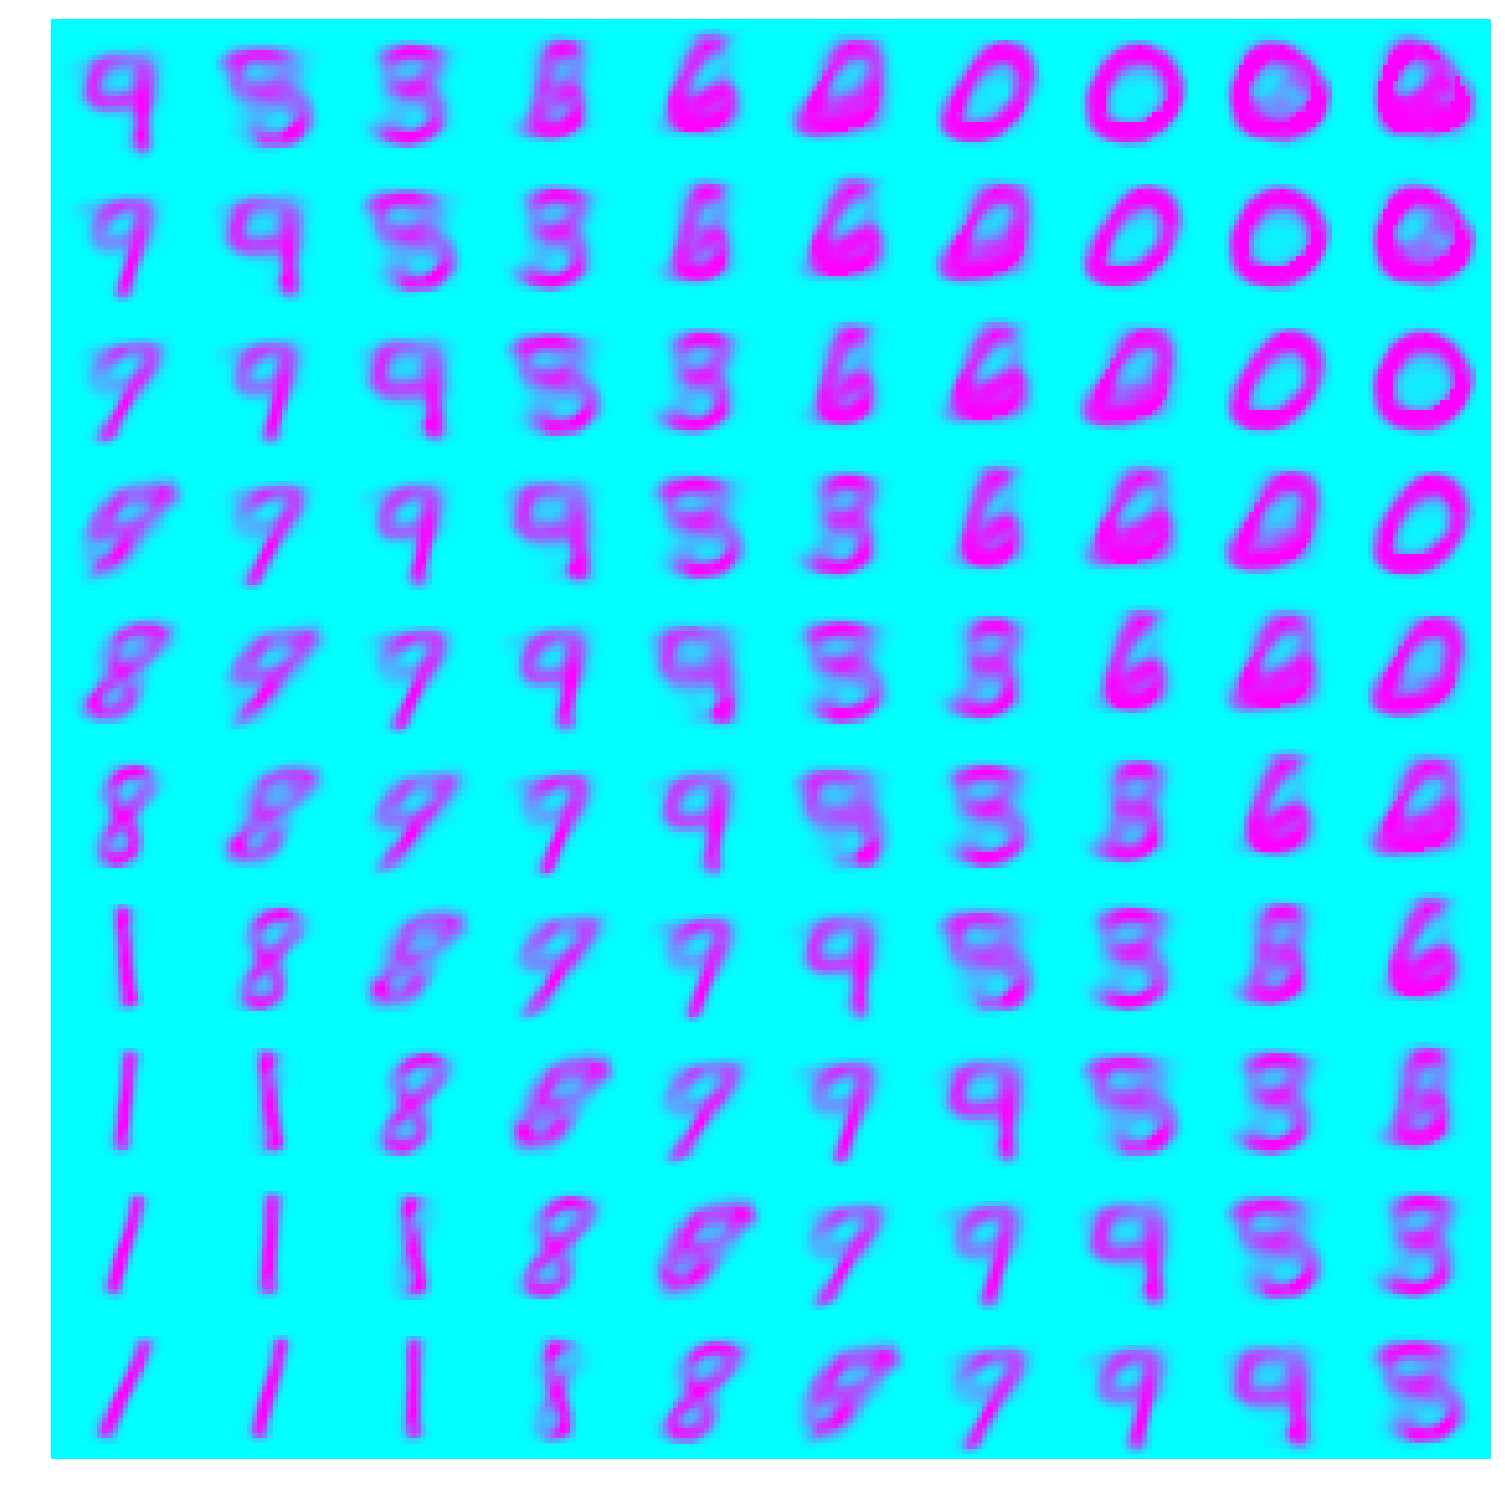

In [58]:
nrow = 10
ncol = 10

fig = plt.figure(figsize=(ncol+1, nrow+1)) 

gs = gridspec.GridSpec(nrow, ncol,
         wspace=0.0, hspace=0.0, 
         top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), 
         left=0.5/(ncol+1), right=1-0.5/(ncol+1)) 

for i in range(nrow):
    for j in range(ncol):
        im = images[i][j]
        ax= plt.subplot(gs[i,j])
        
        vector = np.array([i/10, j/10])
        im = get_image([vector.reshape(-1,2)])[0].reshape(28, 28)
        
        ax.imshow(im, cmap='cool')
        plt.axis('off')

plt.show()

In [66]:
def get_vector(img):
    func = K.function([model.layers[0].input, K.learning_phase()],
                           [model.layers[4].output])
    return func([img.reshape(1,784)])[0]
  

def get_vectors(imgs):
    func = K.function([model.layers[0].input, K.learning_phase()],
                           [model.layers[4].output])
    return func(imgs)
  
  
get_vector(x_train[0])

array([[0.88864547, 0.9913662 ]], dtype=float32)

In [0]:
v_trains = get_vectors([x_train])[0]

In [73]:
v_trains.shape

(60000, 2)